In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
_df=pd.read_csv('/content/gdrive/My Drive/ColabNotebooks/CapstonesDatasets/_df_ventas_historic_CP2.csv')
_df_projected=pd.read_csv('/content/gdrive/My Drive/ColabNotebooks/CapstonesDatasets/_df_ventas_projected_CP1_n.csv')

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA


from math import log


from statsmodels.tsa.seasonal import seasonal_decompose


import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from prophet import Prophet
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error
from itertools import product
import warnings
warnings.filterwarnings('ignore')
from prophet.diagnostics import cross_validation
from pandas import Timedelta



from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
_df.head()

,Unnamed: 0.1,Unnamed: 0,cod_tienda,cod_semana,cod_producto,ventas_unidades,ventas_valor,ventas_volumen,numero_referencias,precio_real_unidades,...,PRECIPITACION,national_holidays_2021,regional_holidays_2021,local_holidays_2021,national_holidays_2022,regional_holidays_2022,local_holidays_2022,national_holidays_2023,regional_holidays_2023,local_holidays_2023
0,0,0,243,42,236,30,19.50,10,1,0.65,...,1.285714,N,N,N,N,N,N,N,N,N
1,1,1,243,42,239,2,1.82,1,1,0.91,...,1.285714,N,N,N,N,N,N,N,N,N
2,2,2,243,42,247,2,10.32,4,1,5.16,...,1.285714,N,N,N,N,N,N,N,N,N
3,3,3,243,42,258,3,14.97,6,1,4.99,...,1.285714,N,N,N,N,N,N,N,N,N
4,4,4,243,42,264,2,10.88,4,1,5.44,...,1.285714,N,N,N,N,N,N,N,N,N


In [ ]:
_df_projected = _df_projected.drop('Unnamed: 0', axis=1)
_df_projected.head()

,cod_tienda,cod_semana,cod_producto,ventas_unidades,ventas_valor,ventas_volumen,numero_referencias,precio_real_unidades,precio_real_volumen,precio_tarifa_unidades,...,promocion_cabecera,promocion_descuento,promocion_expositor,promocion_extra_cantidad,promocion_folleto,promocion_isla,promocion_multicompra,promocion_regalo,factor_extrapolacion,ventas_valor_factor_extrapolacion
0,110,130,205,19,13.30,6,1,0.70,0.33,0.70,...,0,0,0,0,0,0,0,0,NaN,NaN
1,110,130,206,18,17.10,6,1,0.95,0.33,0.95,...,0,0,0,0,0,0,0,0,NaN,NaN
2,110,130,209,10,9.20,3,1,0.92,0.33,0.92,...,0,0,0,0,0,0,0,0,NaN,NaN
3,110,130,210,8,5.28,3,1,0.66,0.33,0.66,...,0,0,0,0,0,0,0,0,NaN,NaN
4,110,130,215,12,9.48,4,1,0.79,0.33,0.79,...,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
_df = _df.drop('Unnamed: 0.1', axis=1)
_df = _df.drop('Unnamed: 0', axis=1)

In [ ]:
#Remplazamos las comas por puntos
#_df['factor_extrapolacion']=_df['factor_extrapolacion'].replace(',', '.', regex=True)

In [ ]:
#convertimos a float
#_df['factor_extrapolacion']=_df['factor_extrapolacion'].astype('float64')

In [ ]:
#_df['ventas_valor_factor_extrapolacion'] = _df['ventas_valor'] * _df['factor_extrapolacion']
#_df['ventas_valor_factor_extrapolacion']

In [ ]:
_df_tsa=_df.copy(deep=True)
_df_tsa.head(2)

,cod_tienda,cod_semana,cod_producto,ventas_unidades,ventas_valor,ventas_volumen,numero_referencias,precio_real_unidades,precio_real_volumen,precio_tarifa_unidades,...,PRECIPITACION,national_holidays_2021,regional_holidays_2021,local_holidays_2021,national_holidays_2022,regional_holidays_2022,local_holidays_2022,national_holidays_2023,regional_holidays_2023,local_holidays_2023
0,243,42,236,30,19.50,10,1,0.65,0.33,0.65,...,1.285714,N,N,N,N,N,N,N,N,N
1,243,42,239,2,1.82,1,1,0.91,0.33,0.91,...,1.285714,N,N,N,N,N,N,N,N,N


In [ ]:
_df_proj=_df_projected.copy(deep=True)

Slicing the data to indentify the top 5 selling manufacturers across Spain

In [ ]:
# Identify the top 5 selling beers
top_manufacturers = _df_tsa.groupby('MANUFACTURER')['ventas_valor'].sum().nlargest(5).index.tolist()
top_manufacturers

['MANUFACTURER 3',
 'MANUFACTURER 2',
 'MANUFACTURER 6',
 'MANUFACTURER 1',
 'MANUFACTURER 4']

In [ ]:
# Filter the data for the top 5 beers
_df_top5 = _df_tsa[_df_tsa['MANUFACTURER'].isin(top_manufacturers)]
_df_top5

,cod_tienda,cod_semana,cod_producto,ventas_unidades,ventas_valor,ventas_volumen,numero_referencias,precio_real_unidades,precio_real_volumen,precio_tarifa_unidades,...,PRECIPITACION,national_holidays_2021,regional_holidays_2021,local_holidays_2021,national_holidays_2022,regional_holidays_2022,local_holidays_2022,national_holidays_2023,regional_holidays_2023,local_holidays_2023
0,243,42,236,30,19.50,10,1,0.65,0.33,0.65,...,1.285714,N,N,N,N,N,N,N,N,N
1,243,42,239,2,1.82,1,1,0.91,0.33,0.91,...,1.285714,N,N,N,N,N,N,N,N,N
2,243,42,247,2,10.32,4,1,5.16,1.98,5.16,...,1.285714,N,N,N,N,N,N,N,N,N
3,243,42,258,3,14.97,6,1,4.99,1.98,4.99,...,1.285714,N,N,N,N,N,N,N,N,N
4,243,42,264,2,10.88,4,1,5.44,1.98,5.44,...,1.285714,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5128386,526,47,607,3,11.37,5,1,3.79,1.50,3.79,...,1.242857,N,N,N,N,N,Y,N,N,N
5128387,526,47,612,24,16.56,8,1,0.69,0.33,0.69,...,1.242857,N,N,N,N,N,Y,N,N,N
5128391,526,47,652,6,37.50,18,1,6.25,3.00,6.25,...,1.242857,N,N,N,N,N,Y,N,N,N
5128392,526,47,654,23,85.10,35,1,3.70,1.50,3.70,...,1.242857,N,N,N,N,N,Y,N,N,N


In [ ]:

top_manufacturers_proj = _df_proj.groupby('MANUFACTURER')['ventas_valor'].sum().nlargest(5).index.tolist()
top_manufacturers_proj

['MANUFACTURER 3',
 'MANUFACTURER 2',
 'MANUFACTURER 1',
 'MANUFACTURER 6',
 'MANUFACTURER 4']

In [ ]:

_df_top5_proj = _df_proj[_df_proj['MANUFACTURER'].isin(top_manufacturers_proj)]
_df_top5_proj

,cod_tienda,cod_semana,cod_producto,ventas_unidades,ventas_valor,ventas_volumen,numero_referencias,precio_real_unidades,precio_real_volumen,precio_tarifa_unidades,...,promocion_cabecera,promocion_descuento,promocion_expositor,promocion_extra_cantidad,promocion_folleto,promocion_isla,promocion_multicompra,promocion_regalo,factor_extrapolacion,ventas_valor_factor_extrapolacion
0,110,130,205,19,13.30,6,1,0.70,0.33,0.70,...,0,0,0,0,0,0,0,0,NaN,NaN
1,110,130,206,18,17.10,6,1,0.95,0.33,0.95,...,0,0,0,0,0,0,0,0,NaN,NaN
2,110,130,209,10,9.20,3,1,0.92,0.33,0.92,...,0,0,0,0,0,0,0,0,NaN,NaN
3,110,130,210,8,5.28,3,1,0.66,0.33,0.66,...,0,0,0,0,0,0,0,0,NaN,NaN
4,110,130,215,12,9.48,4,1,0.79,0.33,0.79,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601693,215,140,1266,2,1.10,1,1,0.55,0.33,0.55,...,0,0,0,0,0,0,0,0,NaN,NaN
601694,215,140,1289,81,31.59,27,1,0.39,0.33,0.58,...,0,0,0,0,0,0,0,0,NaN,NaN
601695,215,140,1310,10,16.40,15,1,1.64,1.50,1.95,...,0,0,0,0,0,0,0,0,NaN,NaN
601696,215,140,1312,103,39.14,34,1,0.38,0.33,0.59,...,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.8 MB/s eta 0:00:00


In [ ]:
# Convert month names to month numbers
_df_top5['month'] = pd.to_datetime(_df_top5['month'], format='%B', errors='coerce').dt.month




# Create 'date' column using 'year' and 'month'
_df_top5['date'] = pd.to_datetime(_df_top5['year'].astype(str) + '-' + _df_top5['month'].astype(str), format='%Y-%m', errors='coerce')

# Drop rows with missing or invalid dates -- Check if (and how many) records get dropped
_df_top5.dropna(subset=['date'], inplace=True)

# Set 'date' column as the index
_df_top5.set_index('date', inplace=True)



In [121]:
_df_top5_proj['month'] = pd.to_datetime(_df_top5_proj['month'], format='%B', errors='coerce').dt.month
_df_top5_proj['date'] = pd.to_datetime(_df_top5_proj['year'].astype(str) + '-' + _df_top5_proj['month'].astype(str), format='%Y-%m', errors='coerce')
_df_top5_proj.dropna(subset=['date'], inplace=True)
_df_top5_proj.set_index('date', inplace=True)



In [ ]:


# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)

#adf_test = sm.tsa.stattools.adfuller(_df_top5['ventas_valor'],maxlag=10)
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
#print("ADF test for the original series")
#print("Statistic Value:" , adf_test[0])
#print("p-value:" , adf_test[1])


# Tests
#s = 4 # quarterly data
#d = ndiffs(_df_top5['ventas_valor'], alpha = 0.05, test='adf')  # regular differences?
#D = nsdiffs(_df_top5['ventas_valor'], m = s, test='ocsb') # # seasonal differences?

#print("Regular differences: ", d)
#print('Seasonal differences:', D)

In [ ]:
# Resample the DataFrame with monthly frequency
#_df_top5 = _df_top5.resample('M').sum()

# Define the aggregation functions for each column
aggregations = {
    'cod_tienda': 'first',
    'cod_semana': 'first',
    'cod_producto': 'first',
    'ventas_unidades': 'sum',
    'ventas_valor': 'sum',
    'ventas_volumen': 'sum',
    'numero_referencias': 'sum',
    'precio_real_unidades': 'sum',
    'precio_real_volumen': 'sum',
    'precio_tarifa_unidades': 'sum',
    'precio_tarifa_volumen': 'sum',
    'month': 'first',
    'year': 'first',
    'season': 'first',
    'CATEGORY': 'first',
    'SEGMENT': 'first',
    'MANUFACTURER': 'first',
    'BRAND': 'first',
    'PACKAGING': 'first',
    'VOLUME': 'first',
    'UNITS': 'first',
    'promocion_cabecera': 'sum',
    'promocion_descuento': 'sum',
    'promocion_expositor': 'sum',
    'promocion_extra_cantidad': 'sum',
    'promocion_folleto': 'sum',
    'promocion_isla': 'sum',
    'promocion_multicompra': 'sum',
    'promocion_regalo': 'sum',
    'factor_extrapolacion': 'first',
    'cod_canal': 'first',
    'cod_provincia': 'first',
    'postal_code': 'first',
    'sales_surface_sqmeters': 'first',
    'Canal': 'first',
    'Channel': 'first',
    'Provincia': 'first',
    'Comunidad autónoma': 'first',
    'Lat': 'first',
    'Lon': 'first',
    'TEMP_MINIMA': 'first',
    'TEMP_MAXIMA': 'first',
    'TEMP_MEDIA': 'first',
    'PRECIPITACION': 'first',
    'national_holidays_2021': 'first',
    'regional_holidays_2021': 'first',
    'local_holidays_2021': 'first',
    'national_holidays_2022': 'first',
    'regional_holidays_2022': 'first',
    'local_holidays_2022': 'first',
    'national_holidays_2023': 'first',
    'regional_holidays_2023': 'first',
    'local_holidays_2023': 'first'
}

# Resample the DataFrame with monthly frequency, preserving all columns
_df_top5 = _df_top5.resample('M').agg(aggregations)

In [125]:
# Define the aggregation functions for each column
aggregations_proj = {
    'cod_tienda': 'first',
    'cod_semana': 'first',
    'cod_producto': 'first',
    'ventas_unidades': 'sum',
    'ventas_valor': 'sum',
    'ventas_volumen': 'sum',
    'numero_referencias': 'sum',
    'precio_real_unidades': 'sum',
    'precio_real_volumen': 'sum',
    'precio_tarifa_unidades': 'sum',
    'precio_tarifa_volumen': 'sum',
    'month': 'first',
    'year': 'first',
    'season': 'first',
    'CATEGORY': 'first',
    'SEGMENT': 'first',
    'MANUFACTURER': 'first',
    'BRAND': 'first',
    'PACKAGING': 'first',
    'VOLUME': 'first',
    'UNITS': 'first',
    'promocion_cabecera': 'sum',
    'promocion_descuento': 'sum',
    'promocion_expositor': 'sum',
    'promocion_extra_cantidad': 'sum',
    'promocion_folleto': 'sum',
    'promocion_isla': 'sum',
    'promocion_multicompra': 'sum',
    'promocion_regalo': 'sum',
    'factor_extrapolacion': 'first'
}

In [ ]:
# Set the frequency of the index explicitly
_df_top5.index.freq = pd.offsets.MonthEnd()


In [126]:
_df_top5_proj=_df_top5_proj.resample('M').agg(aggregations_proj)
_df_top5_proj.index.freq = pd.offsets.MonthEnd()

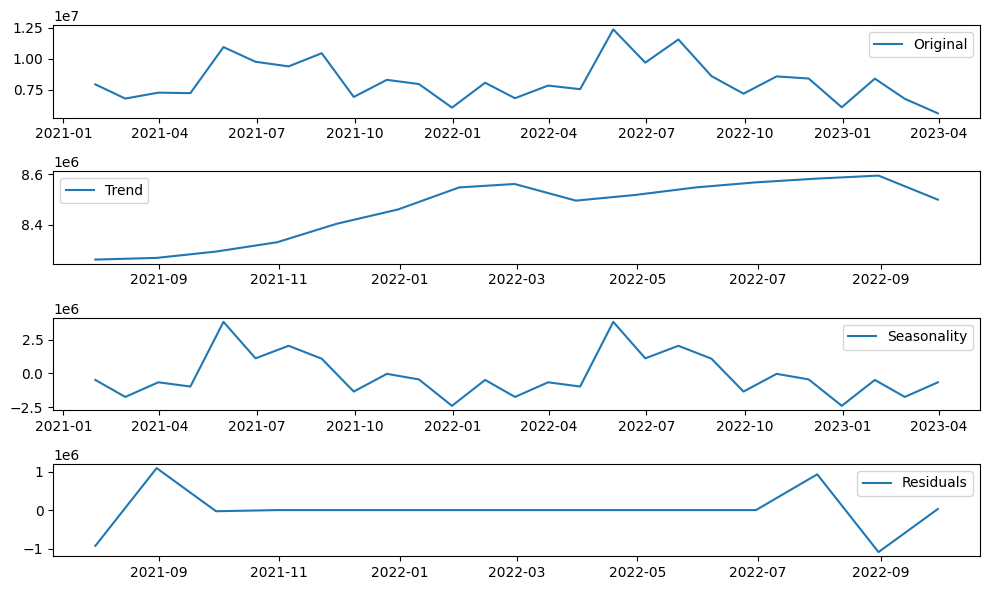

In [ ]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(_df_top5['ventas_valor'], model='additive')


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(_df_top5['ventas_valor'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

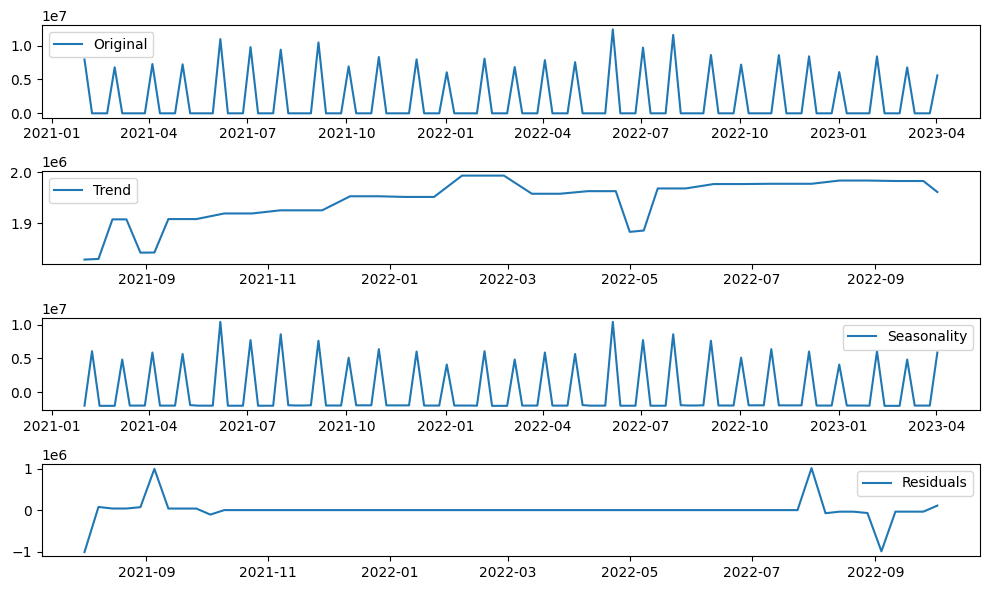

In [ ]:
# Resample the data to weekly frequency
weekly_data = _df_top5.resample('W').sum()

# Set the frequency of the index explicitly
weekly_data.index.freq = pd.offsets.Week()

# Perform seasonal decomposition
decomposition_w = seasonal_decompose(weekly_data['ventas_valor'], model='additive')

trend_w = decomposition_w.trend
seasonal_w = decomposition_w.seasonal
residual_w = decomposition_w.resid

# Plot the decomposed components
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(weekly_data['ventas_valor'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_w, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_w, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_w, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()






In [ ]:
_df_top5.head(3)

,cod_tienda,cod_semana,cod_producto,ventas_unidades,ventas_valor,ventas_volumen,numero_referencias,precio_real_unidades,precio_real_volumen,precio_tarifa_unidades,...,PRECIPITACION,national_holidays_2021,regional_holidays_2021,local_holidays_2021,national_holidays_2022,regional_holidays_2022,local_holidays_2022,national_holidays_2023,regional_holidays_2023,local_holidays_2023
date,,,,,,,,,,,,,,,,,,,,,
2021-01-31,14,5,243,8619191,7940323.70,6430303,156666,348168.74,211539.72,362119.12,...,7.985714,Y,Y,N,N,N,N,N,N,N
2021-02-28,194,9,203,7984159,6791561.54,5684011,127043,279951.26,169989.67,292840.19,...,2.128571,Y,Y,Y,N,N,N,N,N,N
2021-03-31,60,11,215,7251126,7270640.00,5973256,129908,280650.81,173124.90,297547.97,...,4.528571,N,N,Y,N,N,N,N,N,N


In [ ]:
_df_top5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27 entries, 2021-01-31 to 2023-03-31
Freq: M
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cod_tienda                27 non-null     int64  
 1   cod_semana                27 non-null     int64  
 2   cod_producto              27 non-null     int64  
 3   ventas_unidades           27 non-null     int64  
 4   ventas_valor              27 non-null     float64
 5   ventas_volumen            27 non-null     int64  
 6   numero_referencias        27 non-null     int64  
 7   precio_real_unidades      27 non-null     float64
 8   precio_real_volumen       27 non-null     float64
 9   precio_tarifa_unidades    27 non-null     float64
 10  precio_tarifa_volumen     27 non-null     float64
 11  month                     27 non-null     int64  
 12  year                      27 non-null     int64  
 13  season                    27 non-null  

In [ ]:
hols_test=_df_top5.iloc[-5:]

In [ ]:
hols_test

,cod_tienda,cod_semana,cod_producto,ventas_unidades,ventas_valor,ventas_volumen,numero_referencias,precio_real_unidades,precio_real_volumen,precio_tarifa_unidades,...,PRECIPITACION,national_holidays_2021,regional_holidays_2021,local_holidays_2021,national_holidays_2022,regional_holidays_2022,local_holidays_2022,national_holidays_2023,regional_holidays_2023,local_holidays_2023
date,,,,,,,,,,,,,,,,,,,,,
2022-11-30,272,100,987,8856045,8413261.68,6642311,143379,335913.67,193689.99,352848.07,...,0.000000,N,N,N,N,N,N,N,N,Y
2022-12-31,209,103,1198,5937779,6087843.89,4620377,135443,311467.28,181744.83,324870.33,...,0.842857,N,N,N,N,N,N,N,N,N
2023-01-31,272,105,418,9095565,8402295.72,6769619,168960,379003.03,225575.68,397696.49,...,0.842857,N,N,N,N,N,N,N,Y,N
2023-02-28,171,113,40,7805952,6772995.10,5469878,136842,309159.67,181873.66,323256.58,...,1.742857,N,N,N,N,N,N,N,Y,Y
2023-03-31,91,115,830,5639133,5598468.94,4356366,103706,233378.76,137991.00,245293.10,...,0.528571,N,N,N,N,N,N,N,N,Y


In [ ]:
train=_df_top5.iloc[:-5]
test=_df_top5.iloc[-5:]

In [ ]:
historical_mean=np.mean(train['ventas_valor'])
print(historical_mean)

8517664.666363636


In [ ]:
#naively forecast the value, and create a new colun to hold the historical mean of the train set as forecast:
test.loc[:,'pred_mean'] = historical_mean

In [ ]:
def mape(y_true,y_pred):
  return np.mean(np.abs((y_true-y_pred)/y_true))* 100

In [ ]:
mape_hist_mean =mape(test['ventas_valor'],test['pred_mean'])
print(mape_hist_mean)

24.085723605533854


In [ ]:
# The MAPE functions returs 20%,which shows our baseline deviates 20% on avg from the observered monthly

In [ ]:
train.head(2)

,cod_tienda,cod_semana,cod_producto,ventas_unidades,ventas_valor,ventas_volumen,numero_referencias,precio_real_unidades,precio_real_volumen,precio_tarifa_unidades,...,PRECIPITACION,national_holidays_2021,regional_holidays_2021,local_holidays_2021,national_holidays_2022,regional_holidays_2022,local_holidays_2022,national_holidays_2023,regional_holidays_2023,local_holidays_2023
date,,,,,,,,,,,,,,,,,,,,,
2021-01-31,14,5,243,8619191,7940323.70,6430303,156666,348168.74,211539.72,362119.12,...,7.985714,Y,Y,N,N,N,N,N,N,N
2021-02-28,194,9,203,7984159,6791561.54,5684011,127043,279951.26,169989.67,292840.19,...,2.128571,Y,Y,Y,N,N,N,N,N,N


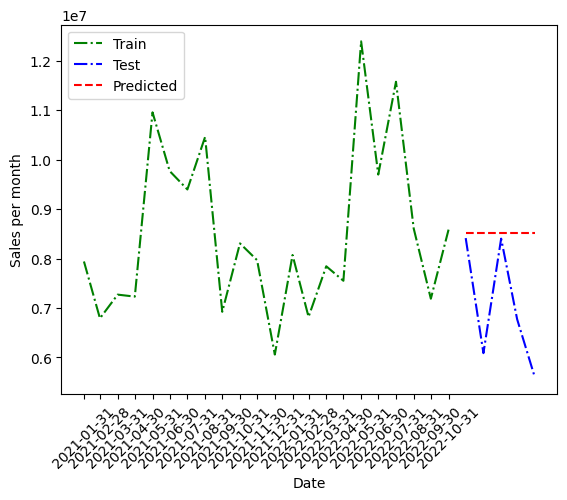

In [ ]:


fig,ax = plt.subplots()

ax.plot(train.index,train['ventas_valor'],'g-.',label='Train')
ax.plot(test.index,test['ventas_valor'],'b-.',label='Test')
ax.plot(test.index,test['pred_mean'],'r--',label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Sales per month')
#ax.axvspan(80,83,color='#808080',alpha=0.2)
ax.legend(loc=2)

# Set x-ticks and labels
ax.set_xticks(train.index)
ax.set_xticklabels(train.index.strftime('%Y-%m-%d'), rotation=45)

plt.show()

In [ ]:
first_year_mean=np.mean(train.ventas_valor[:-10])
print(first_year_mean)

8255369.2749999985


In [ ]:
train.ventas_valor[:-10]

date
2021-01-31     7940323.70
2021-02-28     6791561.54
2021-03-31     7270640.00
2021-04-30     7230411.22
2021-05-31    10954502.83
2021-06-30     9767785.15
2021-07-31     9395990.73
2021-08-31    10458363.24
2021-09-30     6923189.21
2021-10-31     8306030.68
2021-11-30     7966564.46
2021-12-31     6059068.54
Freq: M, Name: ventas_valor, dtype: float64

In [ ]:
test.loc[:,'pred_first_year_mean']=first_year_mean

In [ ]:
mape_first_year_mean =mape(test['ventas_valor'],test['pred_first_year_mean'])
print(mape_first_year_mean)

21.71473450991329


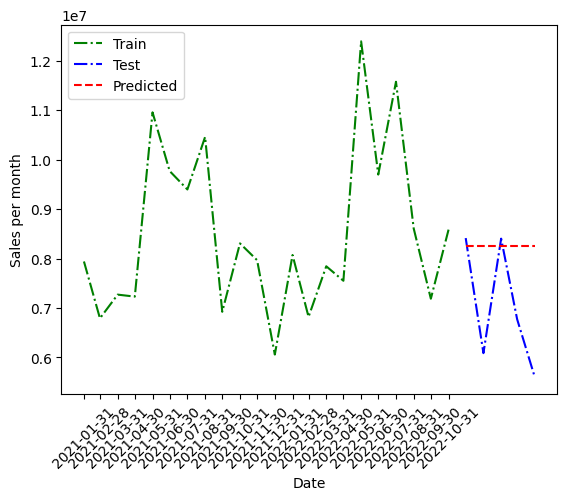

In [ ]:
fig,ax = plt.subplots()

ax.plot(train.index,train['ventas_valor'],'g-.',label='Train')
ax.plot(test.index,test['ventas_valor'],'b-.',label='Test')
ax.plot(test.index,test['pred_first_year_mean'],'r--',label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Sales per month')
#ax.axvspan(80,83,color='#808080',alpha=0.2)
ax.legend(loc=2)

# Set x-ticks and labels
ax.set_xticks(train.index)
ax.set_xticklabels(train.index.strftime('%Y-%m-%d'), rotation=45)

plt.show()

In [ ]:
last= train.ventas_valor.iloc[-1]
print(last)

8583789.58


In [ ]:
train.ventas_valor.iloc[-1]

8583789.58

In [ ]:
test.loc[:,'pred_last'] = last

In [ ]:
mape_last =mape(test['ventas_valor'],test['pred_last'])
print(mape_last)

25.049034334274317


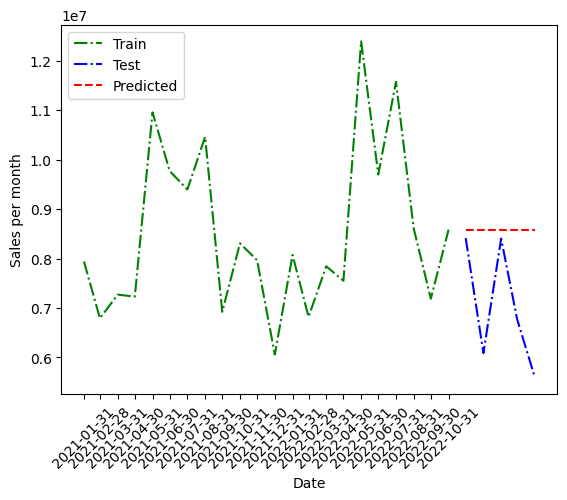

In [ ]:
fig,ax = plt.subplots()

ax.plot(train.index,train['ventas_valor'],'g-.',label='Train')
ax.plot(test.index,test['ventas_valor'],'b-.',label='Test')
ax.plot(test.index,test['pred_last'],'r--',label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Sales per month')
#ax.axvspan(80,83,color='#808080',alpha=0.2)
ax.legend(loc=2)

# Set x-ticks and labels
ax.set_xticks(train.index)
ax.set_xticklabels(train.index.strftime('%Y-%m-%d'), rotation=45)

plt.show()

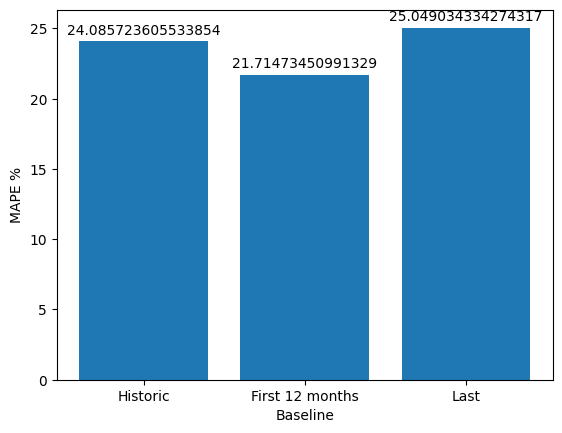

In [ ]:

# Data for the bar plot
values = [mape_hist_mean, mape_first_year_mean, mape_last]
labels = ['Historic', 'First 12 months', 'Last']

# Create the bar plot
bars=plt.bar(labels, values)

# Label the x-axis and y-axis
plt.xlabel('Baseline')
plt.ylabel('MAPE %')

# Add the values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(str(height), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

# Show the plot

# Show the plot
plt.show()


ADF Statistic: -3.2158172905050866
p-value: 0.019087175222022565
Critical Values:
1%: -3.4961490537199116
5%: -2.8903209639580556
10%: -2.5821223452518263


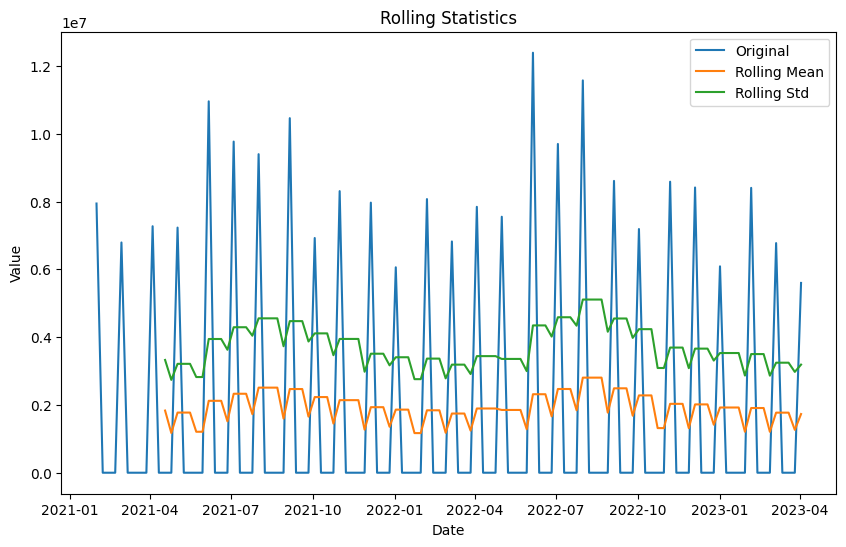

The time series is stationary.


In [ ]:


# Perform ADF test
result = adfuller(weekly_data['ventas_valor'])

# Extract and print test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')


# Define a function to plot rolling statistics
def plot_rolling_statistics(timeseries):
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, label='Original')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Rolling Statistics')
    plt.legend()
    plt.show()

# Plot rolling statistics
plot_rolling_statistics(weekly_data['ventas_valor'])

# Check stationarity based on p-value
if result[1] <= 0.05:
    print('The time series is stationary.')
else:
    print('The time series is non-stationary.')


In [ ]:
!pip install prophet

In [ ]:
# Specify the columns to keep
columns_to_keep = ['ventas_valor']

# Reset the index and create a new DataFrame with the specified columns
_df_prophet = _df_top5.reset_index()[['date'] + columns_to_keep]

_df_prophet

,date,ventas_valor
0,2021-01-31,7940323.70
1,2021-02-28,6791561.54
2,2021-03-31,7270640.00
3,2021-04-30,7230411.22
4,2021-05-31,10954502.83
5,2021-06-30,9767785.15
6,2021-07-31,9395990.73
7,2021-08-31,10458363.24
8,2021-09-30,6923189.21
9,2021-10-31,8306030.68


In [ ]:
# Rename the columns to 'ds' and 'y'
_df_prophet = _df_prophet.rename(columns={'date': 'ds', 'ventas_valor': 'y'})
_df_prophet

,ds,y
0,2021-01-31,7940323.70
1,2021-02-28,6791561.54
2,2021-03-31,7270640.00
3,2021-04-30,7230411.22
4,2021-05-31,10954502.83
5,2021-06-30,9767785.15
6,2021-07-31,9395990.73
7,2021-08-31,10458363.24
8,2021-09-30,6923189.21
9,2021-10-31,8306030.68


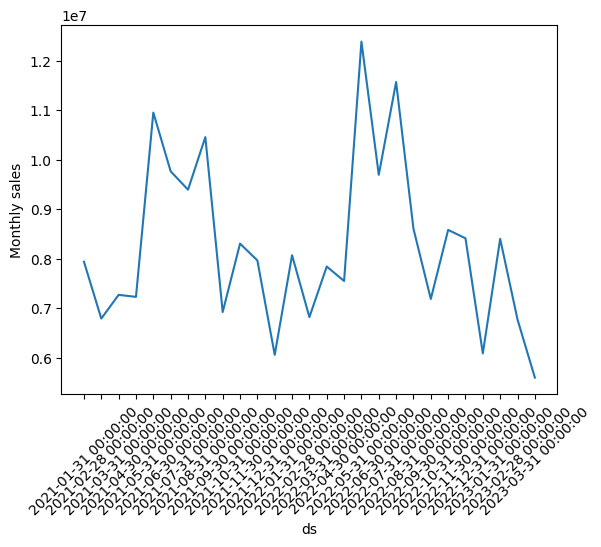

In [ ]:
fig, ax = plt.subplots()
ax.plot(_df_prophet['y'])
ax.set_xlabel('ds')
ax.set_ylabel('Monthly sales')

# Set x-axis ticks to 'ds' column values
xticks = np.arange(len(_df_prophet))
ax.set_xticks(xticks)
ax.set_xticklabels(_df_prophet['ds'], rotation=45)  # Adjust rotation as needed

plt.show()

In [ ]:
train = _df_prophet.iloc[:-5]
test = _df_prophet.iloc[-5:]

In [ ]:
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 1.0],
    'seasonality_prior_scale': [0.1, 1.0, 10.0]
}
params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]
mses = []

In [ ]:


# Get the minimum date from the historical data
min_date = _df_prophet['ds'].min()

# Calculate the start date by adding one day to the minimum date
start_date = min_date + pd.DateOffset(days=1)

# Calculate the end date by subtracting the horizon from the maximum date in the historical data
#end_date = _df_prophet['ds'].max()
#end_date = _df_prophet['ds'].max() - testing_period_length

print(start_date)



2021-02-01 00:00:00


In [ ]:

testing_period_length = pd.DateOffset(months=5)  # Adjust the length of the testing period
end_date = _df_prophet['ds'].max() - testing_period_length

# Generate cutoff dates using the specified start, end, and testing period length
cutoffs = pd.date_range(start=start_date, end=end_date, freq=testing_period_length)

# Print the generated cutoff dates
print(cutoffs)


DatetimeIndex(['2021-02-01', '2021-07-01', '2021-12-01', '2022-05-01',
               '2022-10-01'],
              dtype='datetime64[ns]', freq='<DateOffset: months=5>')


In [ ]:

# Set the horizon for your specific case in number of days
horizon = 5  # Assuming 30 days in a month

#initial = pd.DateOffset(months=21)
initial = Timedelta(days=30*21)

#df_cv = cross_validation(model=m, horizon=horizon,initial=initial, cutoffs=cutoffs)

for param in params:
    m = Prophet(**param)
    m.fit(train)
    #df_cv = cross_validation(model=m, horizon=horizon)
    _df_cv=cross_validation(model=m, horizon=horizon,initial=initial)
    df_p = performance_metrics(_df_cv, rolling_window=1)
    mses.append(df_p['mse'].values[0])

tuning_results = pd.DataFrame(params)
tuning_results['mse'] = mses
best_params = params[np.argmin(mses)]

tuning_results = pd.DataFrame(params)
tuning_results['mse'] = mses
best_params = params[np.argmin(mses)]

print(best_params)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/jim7z3yo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/b33nwoli.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99894', 'data', 'file=/tmp/tmpalrqlv_8/jim7z3yo.json', 'init=/tmp/tmpalrqlv_8/b33nwoli.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_modelotp0r6sd/prophet_model-20230712070857.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:08:57 - cmdstanpy - INFO - Chain [1] start processing
I

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/25ccshaa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/nhk5xtdw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1929', 'data', 'file=/tmp/tmpalrqlv_8/25ccshaa.json', 'init=/tmp/tmpalrqlv_8/nhk5xtdw.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_model7cr6voot/prophet_model-20230712070857.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:08:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekl

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/n_4cmqw4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/lcmicwip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91211', 'data', 'file=/tmp/tmpalrqlv_8/n_4cmqw4.json', 'init=/tmp/tmpalrqlv_8/lcmicwip.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_modelk9vgi2vk/prophet_model-20230712070858.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:08:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with week

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/vhsvz72f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/pplo1y4p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22154', 'data', 'file=/tmp/tmpalrqlv_8/vhsvz72f.json', 'init=/tmp/tmpalrqlv_8/pplo1y4p.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_modeliqpdgaw6/prophet_model-20230712070858.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:08:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with week

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/tmr5q_s0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/hhdm_u83.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89791', 'data', 'file=/tmp/tmpalrqlv_8/tmr5q_s0.json', 'init=/tmp/tmpalrqlv_8/hhdm_u83.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_model2wtqnvp5/prophet_model-20230712070858.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:08:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with week

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/akl0ngrv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/qopia06x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63355', 'data', 'file=/tmp/tmpalrqlv_8/akl0ngrv.json', 'init=/tmp/tmpalrqlv_8/qopia06x.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_model60rz1sgv/prophet_model-20230712070859.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:08:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with week

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/4_u_wr9k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/hmkdqhgm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29370', 'data', 'file=/tmp/tmpalrqlv_8/4_u_wr9k.json', 'init=/tmp/tmpalrqlv_8/hmkdqhgm.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_modelyx4dy722/prophet_model-20230712070859.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:08:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with week

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/aieb1r9a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/08yregvo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50918', 'data', 'file=/tmp/tmpalrqlv_8/aieb1r9a.json', 'init=/tmp/tmpalrqlv_8/08yregvo.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_model7wlp6y38/prophet_model-20230712070859.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:08:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with week

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/tsibgqil.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/7pst4m7i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60660', 'data', 'file=/tmp/tmpalrqlv_8/tsibgqil.json', 'init=/tmp/tmpalrqlv_8/7pst4m7i.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_modelynq10p_p/prophet_model-20230712070900.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:09:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with week

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/ihwkgxpb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/sid7ost2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6634', 'data', 'file=/tmp/tmpalrqlv_8/ihwkgxpb.json', 'init=/tmp/tmpalrqlv_8/sid7ost2.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_modelyqgozzxo/prophet_model-20230712070900.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:09:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1}


In [ ]:
m = Prophet(**best_params)
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/0xuw98nu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/bxeqo8_f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98364', 'data', 'file=/tmp/tmpalrqlv_8/0xuw98nu.json', 'init=/tmp/tmpalrqlv_8/bxeqo8_f.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_modeld9xwdkz9/prophet_model-20230712070901.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:09:01 - cmdstanpy - INFO - Chain [1] start processing
I

In [ ]:
# Assuming 'm' is the trained Prophet model

# Define the forecast horizon in number of periods (months)
forecast_horizon = 5

# Create a dataframe for the forecast horizon
future = m.make_future_dataframe(periods=forecast_horizon, freq='M')

# Generate predictions for the future dataframe
forecast = m.predict(future)


In [ ]:
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat','yhat_lower', 'yhat_upper']]

In [ ]:
test['Baseline'] = train['y'].iloc[-1]

In [ ]:
baseline_mae = mean_absolute_error(test['y'], test['Baseline'])
prophet_mae = mean_absolute_error(test['y'], test['yhat'])
print(prophet_mae)
print(baseline_mae)

2090208.1766543176
1528816.514


In [ ]:
y_prophet=test['yhat']

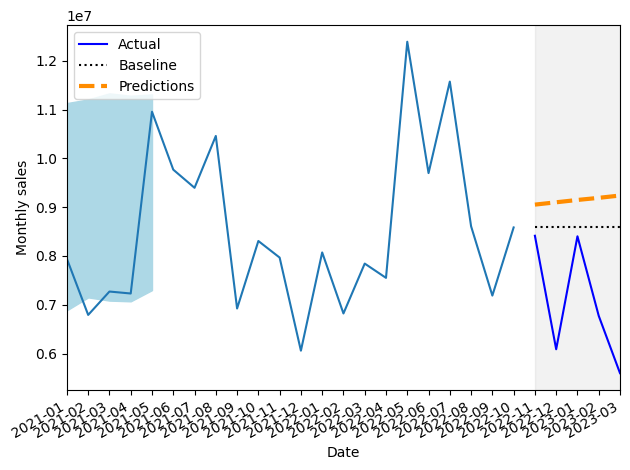

In [ ]:

fig, ax = plt.subplots()
ax.plot(train['y'])
ax.plot(test['y'], 'b-', label='Actual')
ax.plot(test['Baseline'], 'k:', label='Baseline')
ax.plot(test['yhat'], color='darkorange', ls='--', lw=3, label='Predictions')
ax.set_xlabel('Date')
ax.set_ylabel('Monthly sales')
ax.axvspan(22, 26, color='#808080', alpha=0.1)
ax.legend(loc='best')

# Set x-axis ticks to the 'ds' column values in the test data
xticks = range(len(_df_prophet))
ax.set_xticks(xticks)
ax.set_xticklabels(_df_prophet['ds'].dt.strftime('%Y-%m'), rotation=45)

xticks_test=range(len(test))

plt.fill_between(x=list(xticks_test), y1=test['yhat_lower'], y2=test['yhat_upper'], color='lightblue')
plt.xlim(0, len(_df_prophet)-1)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


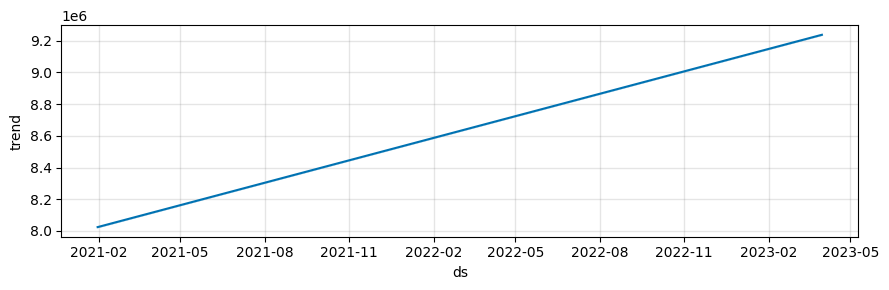

In [ ]:

prophet_components_fig = m.plot_components(forecast)

In [ ]:
rmse_prophet = np.sqrt(np.mean((test['y'] - test['yhat']) ** 2))
print("RMSE Prophet:", rmse_prophet)

RMSE Prophet: 2413227.248787992


In [ ]:
test

,ds,y,yhat,yhat_lower,yhat_upper,Baseline
22,2022-11-30,8413261.68,9.051648e+06,6.886782e+06,1.113164e+07,8583789.58
23,2022-12-31,6087843.89,9.099338e+06,7.150596e+06,1.120629e+07,8583789.58
24,2023-01-31,8402295.72,9.147027e+06,7.084944e+06,1.133064e+07,8583789.58
25,2023-02-28,6772995.10,9.190102e+06,7.070248e+06,1.128150e+07,8583789.58
26,2023-03-31,5598468.94,9.237791e+06,7.299263e+06,1.130826e+07,8583789.58


In [ ]:
train

,ds,y
0,2021-01-31,7940323.70
1,2021-02-28,6791561.54
2,2021-03-31,7270640.00
3,2021-04-30,7230411.22
4,2021-05-31,10954502.83
5,2021-06-30,9767785.15
6,2021-07-31,9395990.73
7,2021-08-31,10458363.24
8,2021-09-30,6923189.21
9,2021-10-31,8306030.68


In [ ]:
# Specify the columns to keep
columns_to_keep = ['ventas_valor','season','month','year','national_holidays_2021', 'regional_holidays_2021', 'local_holidays_2021',
                  'national_holidays_2022', 'regional_holidays_2022', 'local_holidays_2022',
                  'national_holidays_2023', 'regional_holidays_2023', 'local_holidays_2023']

# Reset the index and create a new DataFrame with the specified columns
_df_rf = _df_top5.reset_index()[['date'] + columns_to_keep]

_df_rf

,date,ventas_valor,season,month,year,national_holidays_2021,regional_holidays_2021,local_holidays_2021,national_holidays_2022,regional_holidays_2022,local_holidays_2022,national_holidays_2023,regional_holidays_2023,local_holidays_2023
0,2021-01-31,7940323.70,Winter,1,2021,Y,Y,N,N,N,N,N,N,N
1,2021-02-28,6791561.54,Winter,2,2021,Y,Y,Y,N,N,N,N,N,N
2,2021-03-31,7270640.00,Spring,3,2021,N,N,Y,N,N,N,N,N,N
3,2021-04-30,7230411.22,Spring,4,2021,N,Y,Y,N,N,N,N,N,N
4,2021-05-31,10954502.83,Spring,5,2021,N,Y,Y,N,N,N,N,N,N
5,2021-06-30,9767785.15,Summer,6,2021,N,N,Y,N,N,N,N,N,N
6,2021-07-31,9395990.73,Summer,7,2021,N,N,Y,N,N,N,N,N,N
7,2021-08-31,10458363.24,Summer,8,2021,Y,N,Y,N,N,N,N,N,N
8,2021-09-30,6923189.21,Fall,9,2021,N,N,Y,N,N,N,N,N,N
9,2021-10-31,8306030.68,Fall,10,2021,N,N,N,N,N,N,N,N,N


In [ ]:


# Create a new column 'Holiday_Count' initialized with zeros
_df_rf['Holiday_Count'] = 0

# Iterate over the rows
for index, row in _df_rf.iterrows():
    year = row['year']
    month = row['month']

    # Calculate the holiday count for the corresponding year and month
    holiday_count = sum(row[f"{category}_holidays_{year}"] == 'Y' for category in ['national', 'regional', 'local'])

    # Assign the holiday count to the 'Holiday_Count' column for the current row
    _df_rf.at[index, 'Holiday_Count'] = holiday_count

# Drop the individual holiday columns
_df_rf = _df_rf.drop(['national_holidays_2021', 'regional_holidays_2021', 'local_holidays_2021',
                  'national_holidays_2022', 'regional_holidays_2022', 'local_holidays_2022',
                  'national_holidays_2023', 'regional_holidays_2023', 'local_holidays_2023'], axis=1)


In [ ]:
_df_rf.head(5)

,date,ventas_valor,season,month,year,Holiday_Count
0,2021-01-31,7940323.70,Winter,1,2021,2
1,2021-02-28,6791561.54,Winter,2,2021,3
2,2021-03-31,7270640.00,Spring,3,2021,1
3,2021-04-30,7230411.22,Spring,4,2021,2
4,2021-05-31,10954502.83,Spring,5,2021,2


In [ ]:
# Define a dictionary to map each season to a numeric representation
season_mapping = {
    'Winter': 1,
    'Spring': 2,
    'Summer': 3,
    'Fall': 4
}

# Map the 'season' column to the numeric representation
_df_rf['season_numeric'] = _df_rf['season'].map(season_mapping)

# Drop the original 'season' column if desired
_df_rf = _df_rf.drop('season', axis=1)
_df_rf = _df_rf.drop('year', axis=1)

_df_rf.head(5)

,date,ventas_valor,month,Holiday_Count,season_numeric
0,2021-01-31,7940323.70,1,2,1
1,2021-02-28,6791561.54,2,3,1
2,2021-03-31,7270640.00,3,1,2
3,2021-04-30,7230411.22,4,2,2
4,2021-05-31,10954502.83,5,2,2


In [ ]:
# Rename the columns to 'ds' and 'y'
_df_rf = _df_rf.rename(columns={'date': 'ds', 'ventas_valor': 'y'})
_df_rf

,ds,y,month,Holiday_Count,season_numeric
0,2021-01-31,7940323.70,1,2,1
1,2021-02-28,6791561.54,2,3,1
2,2021-03-31,7270640.00,3,1,2
3,2021-04-30,7230411.22,4,2,2
4,2021-05-31,10954502.83,5,2,2
5,2021-06-30,9767785.15,6,1,3
6,2021-07-31,9395990.73,7,1,3
7,2021-08-31,10458363.24,8,2,3
8,2021-09-30,6923189.21,9,1,4
9,2021-10-31,8306030.68,10,0,4


In [ ]:
_df_rf['VM-1'] = _df_rf['y'].shift(1)
_df_rf.head(2)

,ds,y,month,Holiday_Count,season_numeric,VM-1
0,2021-01-31,7940323.70,1,2,1,NaN
1,2021-02-28,6791561.54,2,3,1,7940323.7


In [ ]:
_df_rf['VY-2'] = _df_rf['ds'] - pd.DateOffset(years=2)
_df_rf = _df_rf.merge(_df_rf[['ds', 'y']], how='left', left_on='VY-2', right_on='ds', suffixes=('', '_VY-2'))



In [ ]:
_df_rf

,ds,y,month,Holiday_Count,season_numeric,VM-1,VY-2,ds_VY-2,y_VY-2
0,2021-01-31,7940323.70,1,2,1,NaN,2019-01-31,NaT,NaN
1,2021-02-28,6791561.54,2,3,1,7940323.70,2019-02-28,NaT,NaN
2,2021-03-31,7270640.00,3,1,2,6791561.54,2019-03-31,NaT,NaN
3,2021-04-30,7230411.22,4,2,2,7270640.00,2019-04-30,NaT,NaN
4,2021-05-31,10954502.83,5,2,2,7230411.22,2019-05-31,NaT,NaN
5,2021-06-30,9767785.15,6,1,3,10954502.83,2019-06-30,NaT,NaN
6,2021-07-31,9395990.73,7,1,3,9767785.15,2019-07-31,NaT,NaN
7,2021-08-31,10458363.24,8,2,3,9395990.73,2019-08-31,NaT,NaN
8,2021-09-30,6923189.21,9,1,4,10458363.24,2019-09-30,NaT,NaN
9,2021-10-31,8306030.68,10,0,4,6923189.21,2019-10-31,NaT,NaN


In [ ]:
_df_rf['VY-1'] = _df_rf['ds'] - pd.DateOffset(years=1)
_df_rf = _df_rf.merge(_df_rf[['ds', 'y']], how='left', left_on='VY-1', right_on='ds', suffixes=('', '_VY-1'))
_df_rf


,ds,y,month,Holiday_Count,season_numeric,VM-1,VY-2,ds_VY-2,y_VY-2,VY-1,ds_VY-1,y_VY-1
0,2021-01-31,7940323.70,1,2,1,NaN,2019-01-31,NaT,NaN,2020-01-31,NaT,NaN
1,2021-02-28,6791561.54,2,3,1,7940323.70,2019-02-28,NaT,NaN,2020-02-28,NaT,NaN
2,2021-03-31,7270640.00,3,1,2,6791561.54,2019-03-31,NaT,NaN,2020-03-31,NaT,NaN
3,2021-04-30,7230411.22,4,2,2,7270640.00,2019-04-30,NaT,NaN,2020-04-30,NaT,NaN
4,2021-05-31,10954502.83,5,2,2,7230411.22,2019-05-31,NaT,NaN,2020-05-31,NaT,NaN
5,2021-06-30,9767785.15,6,1,3,10954502.83,2019-06-30,NaT,NaN,2020-06-30,NaT,NaN
6,2021-07-31,9395990.73,7,1,3,9767785.15,2019-07-31,NaT,NaN,2020-07-31,NaT,NaN
7,2021-08-31,10458363.24,8,2,3,9395990.73,2019-08-31,NaT,NaN,2020-08-31,NaT,NaN
8,2021-09-30,6923189.21,9,1,4,10458363.24,2019-09-30,NaT,NaN,2020-09-30,NaT,NaN
9,2021-10-31,8306030.68,10,0,4,6923189.21,2019-10-31,NaT,NaN,2020-10-31,NaT,NaN


In [ ]:
print(_df_rf.dtypes)

ds                datetime64[ns]
y                        float64
month                      int64
Holiday_Count              int64
season_numeric             int64
VM-1                     float64
VY-2              datetime64[ns]
ds_VY-2           datetime64[ns]
y_VY-2                   float64
VY-1              datetime64[ns]
ds_VY-1           datetime64[ns]
y_VY-1                   float64
dtype: object


In [ ]:
# Impute NaN values with -1
_df_rf.fillna(-1, inplace=True)
_df_rf


,ds,y,month,Holiday_Count,season_numeric,VM-1,VY-2,ds_VY-2,y_VY-2,VY-1,ds_VY-1,y_VY-1
0,2021-01-31,7940323.70,1,2,1,-1.00,2019-01-31,-1,-1.00,2020-01-31,-1,-1.00
1,2021-02-28,6791561.54,2,3,1,7940323.70,2019-02-28,-1,-1.00,2020-02-28,-1,-1.00
2,2021-03-31,7270640.00,3,1,2,6791561.54,2019-03-31,-1,-1.00,2020-03-31,-1,-1.00
3,2021-04-30,7230411.22,4,2,2,7270640.00,2019-04-30,-1,-1.00,2020-04-30,-1,-1.00
4,2021-05-31,10954502.83,5,2,2,7230411.22,2019-05-31,-1,-1.00,2020-05-31,-1,-1.00
5,2021-06-30,9767785.15,6,1,3,10954502.83,2019-06-30,-1,-1.00,2020-06-30,-1,-1.00
6,2021-07-31,9395990.73,7,1,3,9767785.15,2019-07-31,-1,-1.00,2020-07-31,-1,-1.00
7,2021-08-31,10458363.24,8,2,3,9395990.73,2019-08-31,-1,-1.00,2020-08-31,-1,-1.00
8,2021-09-30,6923189.21,9,1,4,10458363.24,2019-09-30,-1,-1.00,2020-09-30,-1,-1.00
9,2021-10-31,8306030.68,10,0,4,6923189.21,2019-10-31,-1,-1.00,2020-10-31,-1,-1.00


In [ ]:
_df_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ds              27 non-null     datetime64[ns]
 1   y               27 non-null     float64       
 2   month           27 non-null     int64         
 3   Holiday_Count   27 non-null     int64         
 4   season_numeric  27 non-null     int64         
 5   VM-1            27 non-null     float64       
 6   VY-2            27 non-null     datetime64[ns]
 7   ds_VY-2         27 non-null     object        
 8   y_VY-2          27 non-null     float64       
 9   VY-1            27 non-null     datetime64[ns]
 10  ds_VY-1         27 non-null     object        
 11  y_VY-1          27 non-null     float64       
dtypes: datetime64[ns](3), float64(4), int64(3), object(2)
memory usage: 2.7+ KB


In [ ]:
# Split the data into features (X) and target (y)
X = _df_rf[['ds','VM-1', 'y_VY-1','month']]
y = _df_rf['y']

# Split the data into train and test sets
X_train=X.loc[X.ds<='2022-10-31']
X_test=X.loc[X.ds>'2022-10-31']
y_train=y.iloc[:22]
y_test=y.iloc[-5:]

X_train=X_train.drop(columns='ds')

X_test=X_test.drop(columns='ds')

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(22, 3) (22,) (5, 3) (5,)


In [ ]:
_df_rf

,ds,y,month,Holiday_Count,season_numeric,VM-1,VY-2,ds_VY-2,y_VY-2,VY-1,ds_VY-1,y_VY-1
0,2021-01-31,7940323.70,1,2,1,-1.00,2019-01-31,-1,-1.00,2020-01-31,-1,-1.00
1,2021-02-28,6791561.54,2,3,1,7940323.70,2019-02-28,-1,-1.00,2020-02-28,-1,-1.00
2,2021-03-31,7270640.00,3,1,2,6791561.54,2019-03-31,-1,-1.00,2020-03-31,-1,-1.00
3,2021-04-30,7230411.22,4,2,2,7270640.00,2019-04-30,-1,-1.00,2020-04-30,-1,-1.00
4,2021-05-31,10954502.83,5,2,2,7230411.22,2019-05-31,-1,-1.00,2020-05-31,-1,-1.00
5,2021-06-30,9767785.15,6,1,3,10954502.83,2019-06-30,-1,-1.00,2020-06-30,-1,-1.00
6,2021-07-31,9395990.73,7,1,3,9767785.15,2019-07-31,-1,-1.00,2020-07-31,-1,-1.00
7,2021-08-31,10458363.24,8,2,3,9395990.73,2019-08-31,-1,-1.00,2020-08-31,-1,-1.00
8,2021-09-30,6923189.21,9,1,4,10458363.24,2019-09-30,-1,-1.00,2020-09-30,-1,-1.00
9,2021-10-31,8306030.68,10,0,4,6923189.21,2019-10-31,-1,-1.00,2020-10-31,-1,-1.00


In [ ]:
# Create the decision tree regressor
rf = RandomForestRegressor()

# Fit the model on the training data
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Predict on the test set
y_pred = rf.predict(X_test)

In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

In [ ]:
print(mse)

1196798572565.7798


In [ ]:
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE - rf):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#Root Mean Squared Error (RMSE): 21463865.341856785
rmse_rf

Root Mean Squared Error (RMSE - rf): 1093982.8940919414


1093982.8940919414

In [ ]:
y_pred

array([7570825.2166    , 6634142.7811    , 7929547.3407    ,
       7048829.56320001, 7760938.71049999])

In [ ]:
dfg = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred })
dfg

,y_test,y_pred
22,8413261.68,7.570825e+06
23,6087843.89,6.634143e+06
24,8402295.72,7.929547e+06
25,6772995.10,7.048830e+06
26,5598468.94,7.760939e+06


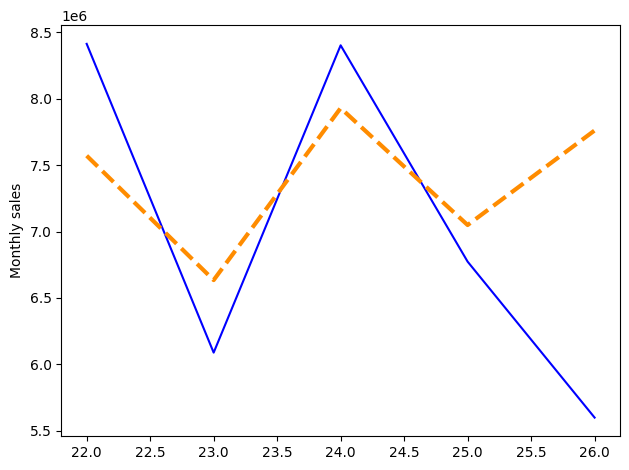

In [ ]:

fig, ax = plt.subplots()

ax.plot(dfg['y_test'], 'b-', label='Actual')

ax.plot(dfg['y_pred'], color='darkorange', ls='--', lw=3, label='Predictions')

ax.set_ylabel('Monthly sales')

plt.tight_layout()



Text(0.5, 1.0, 'Feature importances')

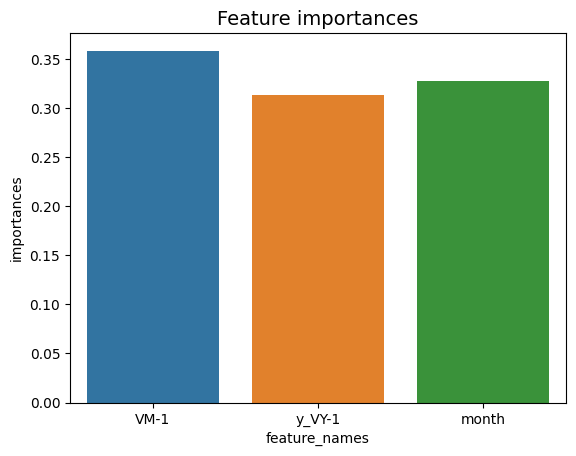

In [ ]:
import seaborn as sns
# Creating importances_df dataframe
importances_df = pd.DataFrame({"feature_names" : rf.feature_names_in_,
                               "importances" : rf.feature_importances_})

# Plotting bar chart, g is from graph
g = sns.barplot(x=importances_df["feature_names"],
                y=importances_df["importances"])
g.set_title("Feature importances", fontsize=14)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred_xgb = model_xgb.predict(X_test)

In [ ]:
y_pred_xgb

array([7564661. , 6077784. , 8071474.5, 6848143. , 7907394. ],
      dtype=float32)

In [ ]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE-XGBoost): {rmse_xgb}")

Root Mean Squared Error (RMSE-XGBoost): 1093982.8940919414


In [ ]:
dfg_xgb = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred_xgb })
dfg_xgb

,y_test,y_pred
22,8413261.68,7564661.0
23,6087843.89,6077784.0
24,8402295.72,8071474.5
25,6772995.10,6848143.0
26,5598468.94,7907394.0


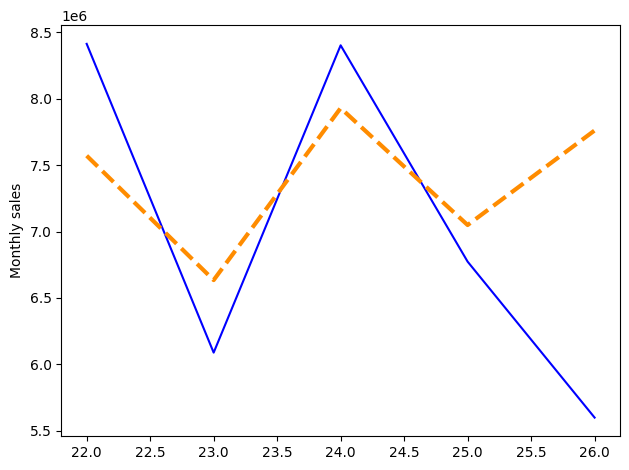

In [ ]:

fig, ax = plt.subplots()

ax.plot(dfg['y_test'], 'b-', label='Actual')

ax.plot(dfg['y_pred'], color='darkorange', ls='--', lw=3, label='Predictions')

ax.set_ylabel('Monthly sales')

plt.tight_layout()

In [ ]:
y_pred_prophet= y_prophet.iloc[:5].values
y_pred_prophet

array([9051648.25371366, 9099337.77110117, 9147027.28848867,
       9190101.69129029, 9237791.2086778 ])

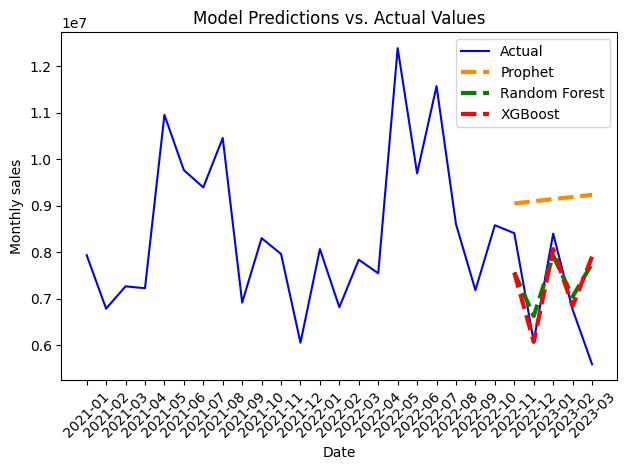

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the actual values and predictions stored in separate variables
# _df_prophet['y'] for actual values, and y_pred_prophet, y_pred, y_pred_xgb for predictions

fig, ax = plt.subplots()

# Plot all actual values
ax.plot(_df_prophet['y'], 'b-', label='Actual')

# Plot the predictions for the last 5 months
ax.plot(range(len(_df_prophet)-5, len(_df_prophet)), y_pred_prophet[-5:], color='darkorange', ls='--', lw=3, label='Prophet')
ax.plot(range(len(_df_prophet)-5, len(_df_prophet)), y_pred[-5:], color='green', ls='--', lw=3, label='Random Forest')
ax.plot(range(len(_df_prophet)-5, len(_df_prophet)), y_pred_xgb[-5:], color='red', ls='--', lw=3, label='XGBoost')

# Set the plot title and labels
ax.set_title('Model Predictions vs. Actual Values')
ax.set_xlabel('Date')
ax.set_ylabel('Monthly sales')

# Set the legend position
ax.legend(loc='best')

# Set x-axis ticks and labels
ax.set_xticks(range(len(_df_prophet)))
ax.set_xticklabels(_df_prophet['ds'].dt.strftime('%Y-%m'), rotation=45)

plt.tight_layout()
plt.show()


Retrain prophet post feature generation

In [ ]:
_df_rf.head(2)

,ds,y,month,Holiday_Count,season_numeric,VM-1,VY-2,ds_VY-2,y_VY-2,VY-1,ds_VY-1,y_VY-1
0,2021-01-31,7940323.70,1,2,1,-1.0,2019-01-31,-1,-1.0,2020-01-31,-1,-1.0
1,2021-02-28,6791561.54,2,3,1,7940323.7,2019-02-28,-1,-1.0,2020-02-28,-1,-1.0


In [ ]:
train_prophet_slice2=_df_rf.iloc[:-5]
test_prophet_slice2=_df_rf.iloc[-5:]

In [ ]:
# Split the data into features (X) and target (y)
train_prophet_r2 = train_prophet_slice2[['ds','y','VM-1', 'y_VY-1','month']]
#test_prophet_r2 = _df_rf['y']

In [ ]:
mses_r2 = []

In [ ]:

# Set the horizon for your specific case in number of days
horizon = 5  # Assuming 30 days in a month

#initial = pd.DateOffset(months=21)
initial = Timedelta(days=30*21)

#df_cv = cross_validation(model=m, horizon=horizon,initial=initial, cutoffs=cutoffs)

for param in params:
    m_p_2 = Prophet(**param)
    m_p_2.add_regressor('VM-1')
    m_p_2.add_regressor('y_VY-1')
    m_p_2.add_regressor('month')
    m_p_2.fit(train_prophet_r2)

    #df_cv = cross_validation(model=m, horizon=horizon)
    _df_cv=cross_validation(model=m_p_2, horizon=horizon,initial=initial)
    df_p = performance_metrics(_df_cv, rolling_window=1)
    mses_r2.append(df_p['mse'].values[0])

tuning_results = pd.DataFrame(params)
tuning_results['mse'] = mses_r2
best_params = params[np.argmin(mses_r2)]

tuning_results = pd.DataFrame(params)
tuning_results['mse'] = mses_r2
best_params = params[np.argmin(mses_r2)]

print(best_params)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/uii3ofxz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/t5urp1dq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24503', 'data', 'file=/tmp/tmpalrqlv_8/uii3ofxz.json', 'init=/tmp/tmpalrqlv_8/t5urp1dq.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_modeldd54p7wf/prophet_model-20230712073907.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:39:07 - cmdstanpy - INFO - Chain [1] start processing
I

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/jip7f7j0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/x2txhty7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55999', 'data', 'file=/tmp/tmpalrqlv_8/jip7f7j0.json', 'init=/tmp/tmpalrqlv_8/x2txhty7.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_modely9kcy419/prophet_model-20230712073907.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:39:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with week

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/00vzoaj_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/13wg967l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84837', 'data', 'file=/tmp/tmpalrqlv_8/00vzoaj_.json', 'init=/tmp/tmpalrqlv_8/13wg967l.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_modelnmt03vfc/prophet_model-20230712073907.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:39:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with week

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/thm1bb6o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/64on5jrx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34136', 'data', 'file=/tmp/tmpalrqlv_8/thm1bb6o.json', 'init=/tmp/tmpalrqlv_8/64on5jrx.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_modelozlj4soz/prophet_model-20230712073908.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:39:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with week

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/k15ctmyi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/uwjqmclh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78376', 'data', 'file=/tmp/tmpalrqlv_8/k15ctmyi.json', 'init=/tmp/tmpalrqlv_8/uwjqmclh.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_modeltxnwkhqu/prophet_model-20230712073908.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:39:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with week

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/2qm_rc8b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/lorvkfjv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97969', 'data', 'file=/tmp/tmpalrqlv_8/2qm_rc8b.json', 'init=/tmp/tmpalrqlv_8/lorvkfjv.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_modelsma5y0bt/prophet_model-20230712073909.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:39:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with week

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/vx860rh4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/3s7wlocm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50055', 'data', 'file=/tmp/tmpalrqlv_8/vx860rh4.json', 'init=/tmp/tmpalrqlv_8/3s7wlocm.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_modelk78lox6s/prophet_model-20230712073909.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:39:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with week

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/66ojcvec.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/b1t2jjix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26710', 'data', 'file=/tmp/tmpalrqlv_8/66ojcvec.json', 'init=/tmp/tmpalrqlv_8/b1t2jjix.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_modele0d3kfus/prophet_model-20230712073910.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:39:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with week

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/en39um09.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/qkgogmex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92583', 'data', 'file=/tmp/tmpalrqlv_8/en39um09.json', 'init=/tmp/tmpalrqlv_8/qkgogmex.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_model3lq8zipj/prophet_model-20230712073910.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:39:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with week

  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/2fhw9n4m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/sqpjevhc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53830', 'data', 'file=/tmp/tmpalrqlv_8/2fhw9n4m.json', 'init=/tmp/tmpalrqlv_8/sqpjevhc.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_model99mmisp3/prophet_model-20230712073911.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:39:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1}


In [ ]:
m_p_2 = Prophet(**best_params)
m_p_2.fit(train_prophet_r2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/jvzxx05z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalrqlv_8/yngpa5ks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3289', 'data', 'file=/tmp/tmpalrqlv_8/jvzxx05z.json', 'init=/tmp/tmpalrqlv_8/yngpa5ks.json', 'output', 'file=/tmp/tmpalrqlv_8/prophet_model9o32e786/prophet_model-20230712074622.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:46:22 - cmdstanpy - INFO - Chain [1] start processing
IN

In [ ]:


# Create a dataframe for the forecast horizon
future_p_r2 = m_p_2.make_future_dataframe(periods=forecast_horizon, freq='M')

# Generate predictions for the future dataframe
forecast_p_r2 = m_p_2.predict(future_p_r2)


In [ ]:
test_prophet_slice2[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_p_r2[['yhat','yhat_lower', 'yhat_upper']]

In [ ]:
test_prophet_slice2['Baseline'] = train_prophet_r2['y'].iloc[-1]

In [ ]:
baseline_mae_r2 = mean_absolute_error(test_prophet_slice2['y'], test_prophet_slice2['Baseline'])
prophet_mae_r2 = mean_absolute_error(test_prophet_slice2['y'], test_prophet_slice2['yhat'])
print(prophet_mae_r2)
print(baseline_mae_r2)

2090208.1766543176
1528816.514


In [ ]:
y_prophet_r2=test_prophet_slice2['yhat']

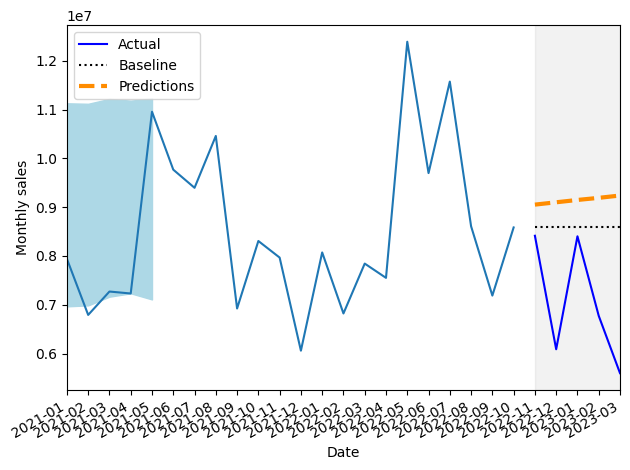

In [ ]:

fig, ax = plt.subplots()
ax.plot(train_prophet_r2['y'])
ax.plot(test_prophet_slice2['y'], 'b-', label='Actual')
ax.plot(test_prophet_slice2['Baseline'], 'k:', label='Baseline')
ax.plot(test_prophet_slice2['yhat'], color='darkorange', ls='--', lw=3, label='Predictions')
ax.set_xlabel('Date')
ax.set_ylabel('Monthly sales')
ax.axvspan(22, 26, color='#808080', alpha=0.1)
ax.legend(loc='best')

# Set x-axis ticks to the 'ds' column values in the test data
xticks = range(len(_df_rf))
ax.set_xticks(xticks)
ax.set_xticklabels(_df_rf['ds'].dt.strftime('%Y-%m'), rotation=45)

xticks_test=range(len(test))

plt.fill_between(x=list(xticks_test), y1=test_prophet_slice2['yhat_lower'], y2=test_prophet_slice2['yhat_upper'], color='lightblue')
plt.xlim(0, len(_df_rf)-1)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


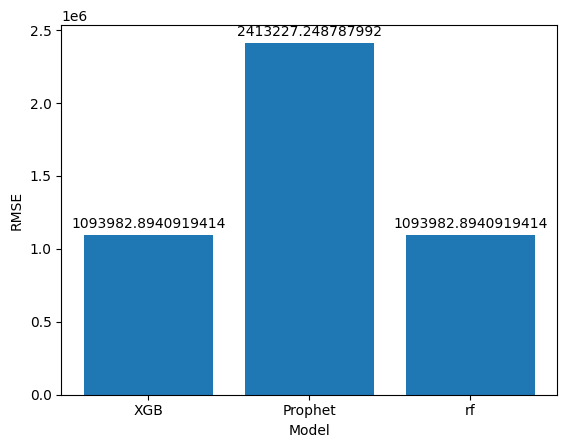

In [ ]:
# Data for the bar plot

values = [rmse_xgb,rmse_prophet,rmse_rf]
labels = ['XGB', 'Prophet', 'rf']

# Create the bar plot
bars=plt.bar(labels, values)

# Label the x-axis and y-axis
plt.xlabel('Model')
plt.ylabel('RMSE')

# Add the values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(str(height), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

# Show the plot

# Show the plot
plt.show()


Test against projected values and plot - XGBoost only

In [127]:
_df_top5_proj.head()

,cod_tienda,cod_semana,cod_producto,ventas_unidades,ventas_valor,ventas_volumen,numero_referencias,precio_real_unidades,precio_real_volumen,precio_tarifa_unidades,...,UNITS,promocion_cabecera,promocion_descuento,promocion_expositor,promocion_extra_cantidad,promocion_folleto,promocion_isla,promocion_multicompra,promocion_regalo,factor_extrapolacion
date,,,,,,,,,,,,,,,,,,,,,
2023-03-31,199,117,1318,992864,1052595.39,810322,18537,41242.33,24717.20,43692.86,...,1CT,0,0,0,0,0,0,0,0,NaN
2023-04-30,198,121,758,4644097,5238743.72,4009732,94007,214257.63,126814.99,224772.28,...,1CT,0,0,0,0,0,0,0,0,NaN
2023-05-31,110,126,607,4535819,4832643.75,3834601,76189,173419.73,104738.13,184703.01,...,6CT,0,0,0,0,0,0,0,0,NaN
2023-06-30,110,130,205,5310096,5097358.20,4148830,77296,177508.95,107105.49,188850.86,...,1CT,0,0,0,0,0,0,0,0,NaN
2023-07-31,152,132,863,6053983,6264280.35,4936732,96517,223385.17,134292.13,237113.52,...,1CT,0,0,0,0,0,0,0,0,NaN


Prepare dataset with projected data provide, and run it pass through trained XGBoost model.
- must do, recreate the relevant features used in the train dataset.

In [128]:
# Specify the columns to keep
columns_to_keep = ['ventas_valor','season','month','year']

# Reset the index and create a new DataFrame with the specified columns
_df_proj_final = _df_top5_proj.reset_index()[['date'] + columns_to_keep]
_df_proj_final

,date,ventas_valor,season,month,year
0,2023-03-31,1052595.39,Spring,3,2023
1,2023-04-30,5238743.72,Spring,4,2023
2,2023-05-31,4832643.75,Spring,5,2023
3,2023-06-30,5097358.20,Summer,6,2023
4,2023-07-31,6264280.35,Summer,7,2023
5,2023-08-31,4799136.32,Summer,8,2023
6,2023-09-30,996082.02,Fall,9,2023


In [129]:
_df_proj_final = _df_proj_final.rename(columns={'date': 'ds', 'ventas_valor': 'y'})
_df_proj_final

,ds,y,season,month,year
0,2023-03-31,1052595.39,Spring,3,2023
1,2023-04-30,5238743.72,Spring,4,2023
2,2023-05-31,4832643.75,Spring,5,2023
3,2023-06-30,5097358.20,Summer,6,2023
4,2023-07-31,6264280.35,Summer,7,2023
5,2023-08-31,4799136.32,Summer,8,2023
6,2023-09-30,996082.02,Fall,9,2023


In [ ]:
last_year_month = _df_rf.loc[_df_rf['ds'].dt.year == (_df_proj_final['ds'].max().year - 1), 'ds'].dt.month.unique().max()


In [ ]:
previous_month = _df_rf.loc[_df_rf['ds'].dt.month == (_df_proj_final['ds'].min().month - 1), 'y'].values[-1]


In [137]:
# Add the extracted values to the projected dataset
_df_proj_final['VY-1'] = _df_proj_final['ds'] - pd.DateOffset(years=1)
_df_proj_final = _df_proj_final.merge(_df_rf[['ds', 'y']], how='left', left_on='VY-1', right_on='ds', suffixes=('', '_VY-1'))
_df_proj_final['VM-1'] = _df_proj_final['y'].shift(1)

# Drop unnecessary columns from the projected dataset
#projected_data.drop(['ds_VY-1', 'y_VY-1'], axis=1, inplace=True)
_df_proj_final

,ds,y,season,month,year,VY-1,ds_VY-1,y_VY-1,VM-1
0,2023-03-31,1052595.39,Spring,3,2023,2022-03-31,2022-03-31,7843321.39,NaN
1,2023-04-30,5238743.72,Spring,4,2023,2022-04-30,2022-04-30,7550710.21,1052595.39
2,2023-05-31,4832643.75,Spring,5,2023,2022-05-31,2022-05-31,12388667.53,5238743.72
3,2023-06-30,5097358.20,Summer,6,2023,2022-06-30,2022-06-30,9697179.87,4832643.75
4,2023-07-31,6264280.35,Summer,7,2023,2022-07-31,2022-07-31,11572148.51,5097358.20
5,2023-08-31,4799136.32,Summer,8,2023,2022-08-31,2022-08-31,8607704.17,6264280.35
6,2023-09-30,996082.02,Fall,9,2023,2022-09-30,2022-09-30,7187877.71,4799136.32


In [138]:
_df_proj_final.fillna(-1, inplace=True)
_df_proj_final

,ds,y,season,month,year,VY-1,ds_VY-1,y_VY-1,VM-1
0,2023-03-31,1052595.39,Spring,3,2023,2022-03-31,2022-03-31,7843321.39,-1.00
1,2023-04-30,5238743.72,Spring,4,2023,2022-04-30,2022-04-30,7550710.21,1052595.39
2,2023-05-31,4832643.75,Spring,5,2023,2022-05-31,2022-05-31,12388667.53,5238743.72
3,2023-06-30,5097358.20,Summer,6,2023,2022-06-30,2022-06-30,9697179.87,4832643.75
4,2023-07-31,6264280.35,Summer,7,2023,2022-07-31,2022-07-31,11572148.51,5097358.20
5,2023-08-31,4799136.32,Summer,8,2023,2022-08-31,2022-08-31,8607704.17,6264280.35
6,2023-09-30,996082.02,Fall,9,2023,2022-09-30,2022-09-30,7187877.71,4799136.32


In [ ]:
# Split the data into features (X) and target (y)
X = _df_proj_final[['ds','VM-1', 'y_VY-1','month']]
y = _df_rf['y']

# Split the data into train and test sets
X_train=X.loc[X.ds<='2022-10-31']
X_test=X.loc[X.ds>'2022-10-31']
y_train=y.iloc[:22]
y_test=y.iloc[-5:]

X_train=X_train.drop(columns='ds')

X_test=X_test.drop(columns='ds')

In [143]:
X = _df_proj_final[['VM-1', 'y_VY-1','month']]

In [147]:
y = _df_proj_final['y']

In [145]:

predictions = model_xgb.predict(X)
predictions

array([ 8276267.5,  7946687.5, 12388665. , 11425380. , 12101506. ,
       10637451. ,  8187190. ], dtype=float32)

In [148]:
dfg_xgb_proj = pd.DataFrame({'y_test':y, 'y_pred':predictions })
dfg_xgb_proj

,y_test,y_pred
0,1052595.39,8276267.5
1,5238743.72,7946687.5
2,4832643.75,12388665.0
3,5097358.20,11425380.0
4,6264280.35,12101506.0
5,4799136.32,10637451.0
6,996082.02,8187190.0


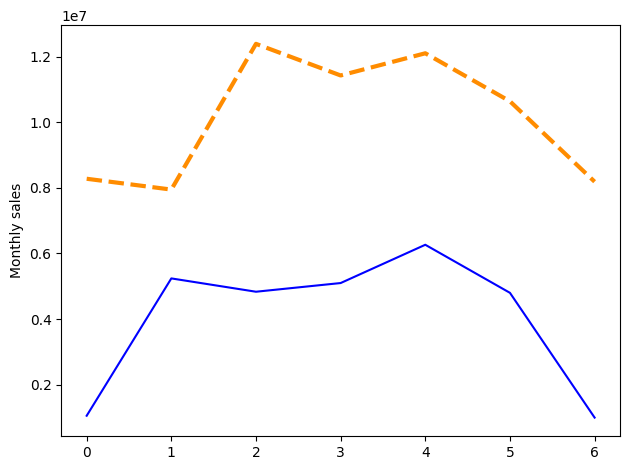

In [150]:
fig, ax = plt.subplots()

ax.plot(dfg_xgb_proj['y_test'], 'b-', label='Actual')

ax.plot(dfg_xgb_proj['y_pred'], color='darkorange', ls='--', lw=3, label='Predictions')

ax.set_ylabel('Monthly sales')

plt.tight_layout()

In [153]:

historical_actual_values = _df_rf[['ds', 'y']]


projected_actual_values = _df_proj_final[['ds', 'y']]

combined = pd.concat([historical_actual_values, projected_actual_values], ignore_index=True)

combined

,ds,y
0,2021-01-31,7940323.70
1,2021-02-28,6791561.54
2,2021-03-31,7270640.00
3,2021-04-30,7230411.22
4,2021-05-31,10954502.83
5,2021-06-30,9767785.15
6,2021-07-31,9395990.73
7,2021-08-31,10458363.24
8,2021-09-30,6923189.21
9,2021-10-31,8306030.68


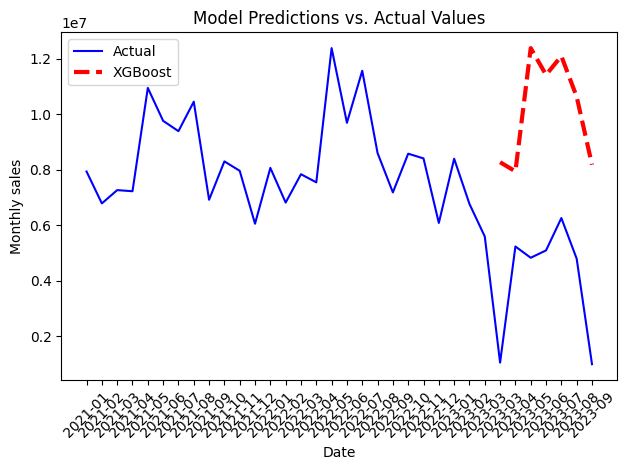

In [155]:
import matplotlib.pyplot as plt

# Assuming you have the actual values and predictions stored in separate variables
# _df_prophet['y'] for actual values, and y_pred_prophet, y_pred, y_pred_xgb for predictions

fig, ax = plt.subplots()

# Plot all actual values
ax.plot(combined['y'], 'b-', label='Actual')

# Plot the predictions for the last 5 months
ax.plot(range(len(combined)-7, len(combined)), dfg_xgb_proj['y_pred'], color='red', ls='--', lw=3, label='XGBoost')

# Set the plot title and labels
ax.set_title('Model Predictions vs. Actual Values')
ax.set_xlabel('Date')
ax.set_ylabel('Monthly sales')

# Set the legend position
ax.legend(loc='best')

# Set x-axis ticks and labels
ax.set_xticks(range(len(combined)))
ax.set_xticklabels(combined['ds'].dt.strftime('%Y-%m'), rotation=45)

plt.tight_layout()
plt.show()


In [1]:
from datetime import datetime, timedelta

# Define the start date for predictions as a specific YYYY-MM-DD string
start_date_str = '2023-03'

# Parse the start date string into a datetime object
start_date = datetime.strptime(start_date_str, '%Y-%m').date()

# Create a list of future timestamps for the next 24 months
future_timestamps = []
for i in range(12):
    future_date = start_date + timedelta(days=(i * 30))  # Assuming monthly predictions
    future_timestamps.append(future_date.strftime('%Y-%m'))

# Print the list of future timestamps
print(future_timestamps)


['2023-03', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01']


In [8]:

# Extract year and month as separate features
df = pd.DataFrame({'timestamp': future_timestamps})
df['year'] = pd.to_datetime(df['timestamp']).dt.year
df['month'] = pd.to_datetime(df['timestamp']).dt.month

# Perform predictions
data = df[['year', 'month']].values
dmat = xgb.DMatrix(data)
predictions = model_xgb.predict(dmat)

# Print the predictions
for timestamp, prediction in zip(future_timestamps, predictions):
    print(timestamp, prediction)


NameError: ignored